# Practical Task : K-means clustering

## Categorising countries

### Data Source

The data used in this task was orginally sourced from Help.NGO. This international non-governmental organisation specialises in emergency response, preparedness, and risk mitigation.  

### Dataset Attributes
- country: name of the country
- child_mort: death of children under 5 years of age per 1000 live births
- exports: exports of goods and services per capita. Given as a percentage of the GDP per capita
- health: total health spending per capita. Given as a percentage of GDP per capita
- imports: imports of goods and services per capita. Given as a percentage of the GDP per capita
- income: net income per person
- inflation: the measurement of the annual growth rate of the Total GDP
- life_expec: the average number of years a new born child would live if the current mortality patterns remain the same
- total_fer: the number of children that would be born to each woman if the current age-fertility rates remains the same
- gdpp: the GDP per capita. Calculated as the Total GDP divided by the total population.

## Objective  
To group countries using socio-economic and health factors to determine the development status of the country.

In [1]:
# Import libraries
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Random state seed
rseed = 42

## Load and explore data

In [3]:
# Import the dataset
ctry_df = pd.read_csv('Country-data.csv')
ctry_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Check the shape
ctry_df.shape

(167, 10)

In [5]:
# Check datatypes & counts
ctry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Get descriptive statistics
ctry_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
# Identify any missing data
ctry_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

As you can see above, there is no missing data in the given dataset

## Preprocessing and Feature Selection

In [8]:
# Drop any non-numeric features (columns)
ctry_df.drop("country",axis=1, inplace=True)

<Axes: >

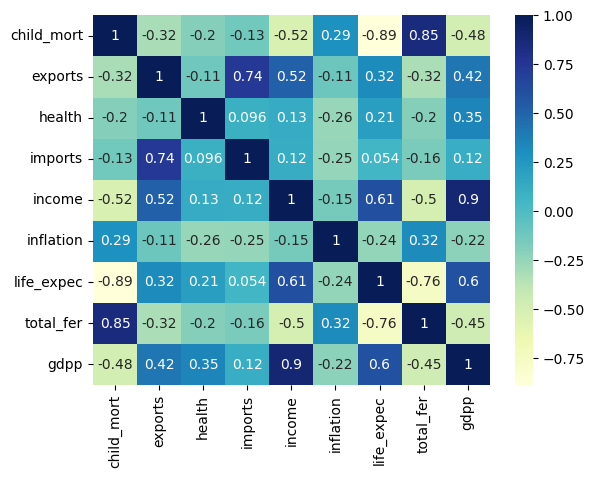

In [9]:
# Create a correlation map of features to explore relationships between features
sns.heatmap(ctry_df.corr(), annot=True, cmap='YlGnBu')


As you can see above GDP per capita is highly correlated with Income, life_expec, exports variables.

In [10]:
ctry_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


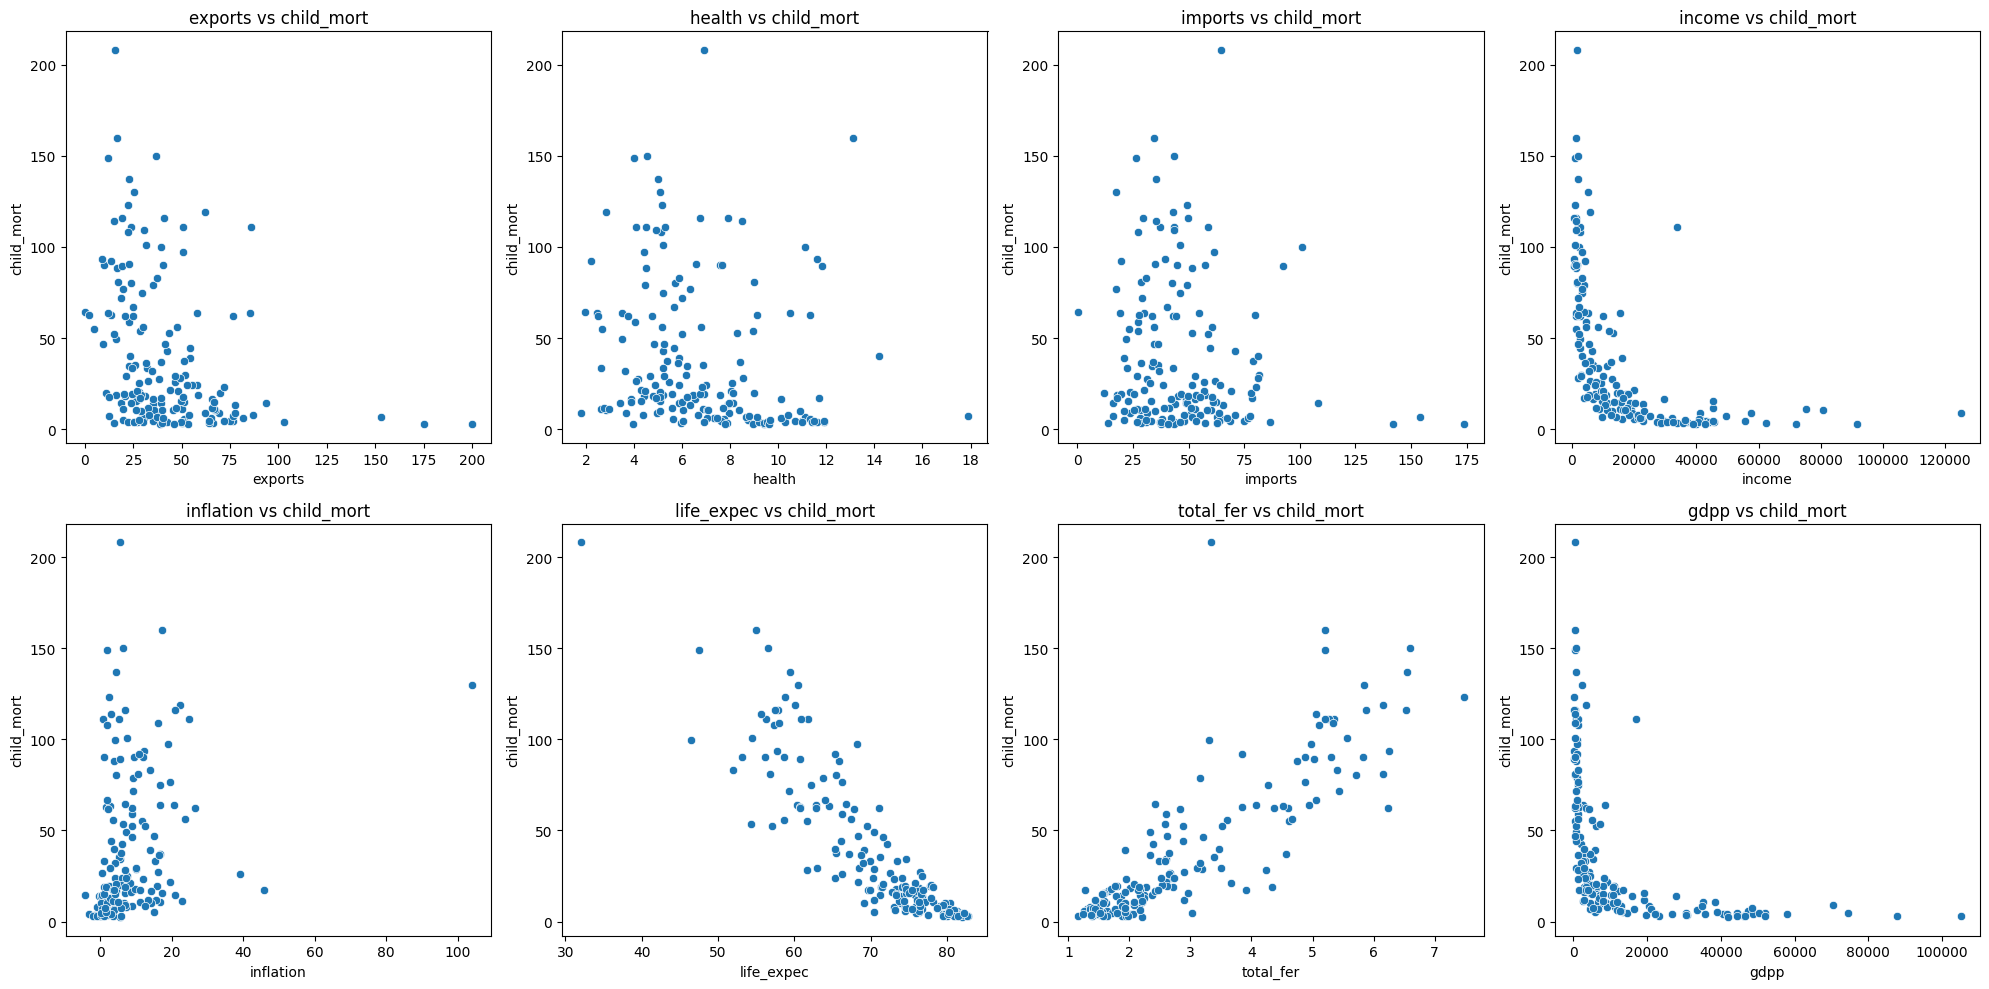

In [11]:
# Explore the continuous independent features against child_mort using scatter plots.
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
variables = ctry_df.columns
for i in range(len(variables)-1):
        subplot = ax[i // 4, i % 4]
        sns.scatterplot(x=variables[i+1], y=variables[0], data=ctry_df, ax=subplot, legend=False)
        subplot.set_title(f"{variables[i+1]} vs {variables[0]}")
plt.tight_layout()
plt.show()

From the above scatterplot, we can observere few things such as child mortality is high if the income is low as well as if the GDP per capita is low.

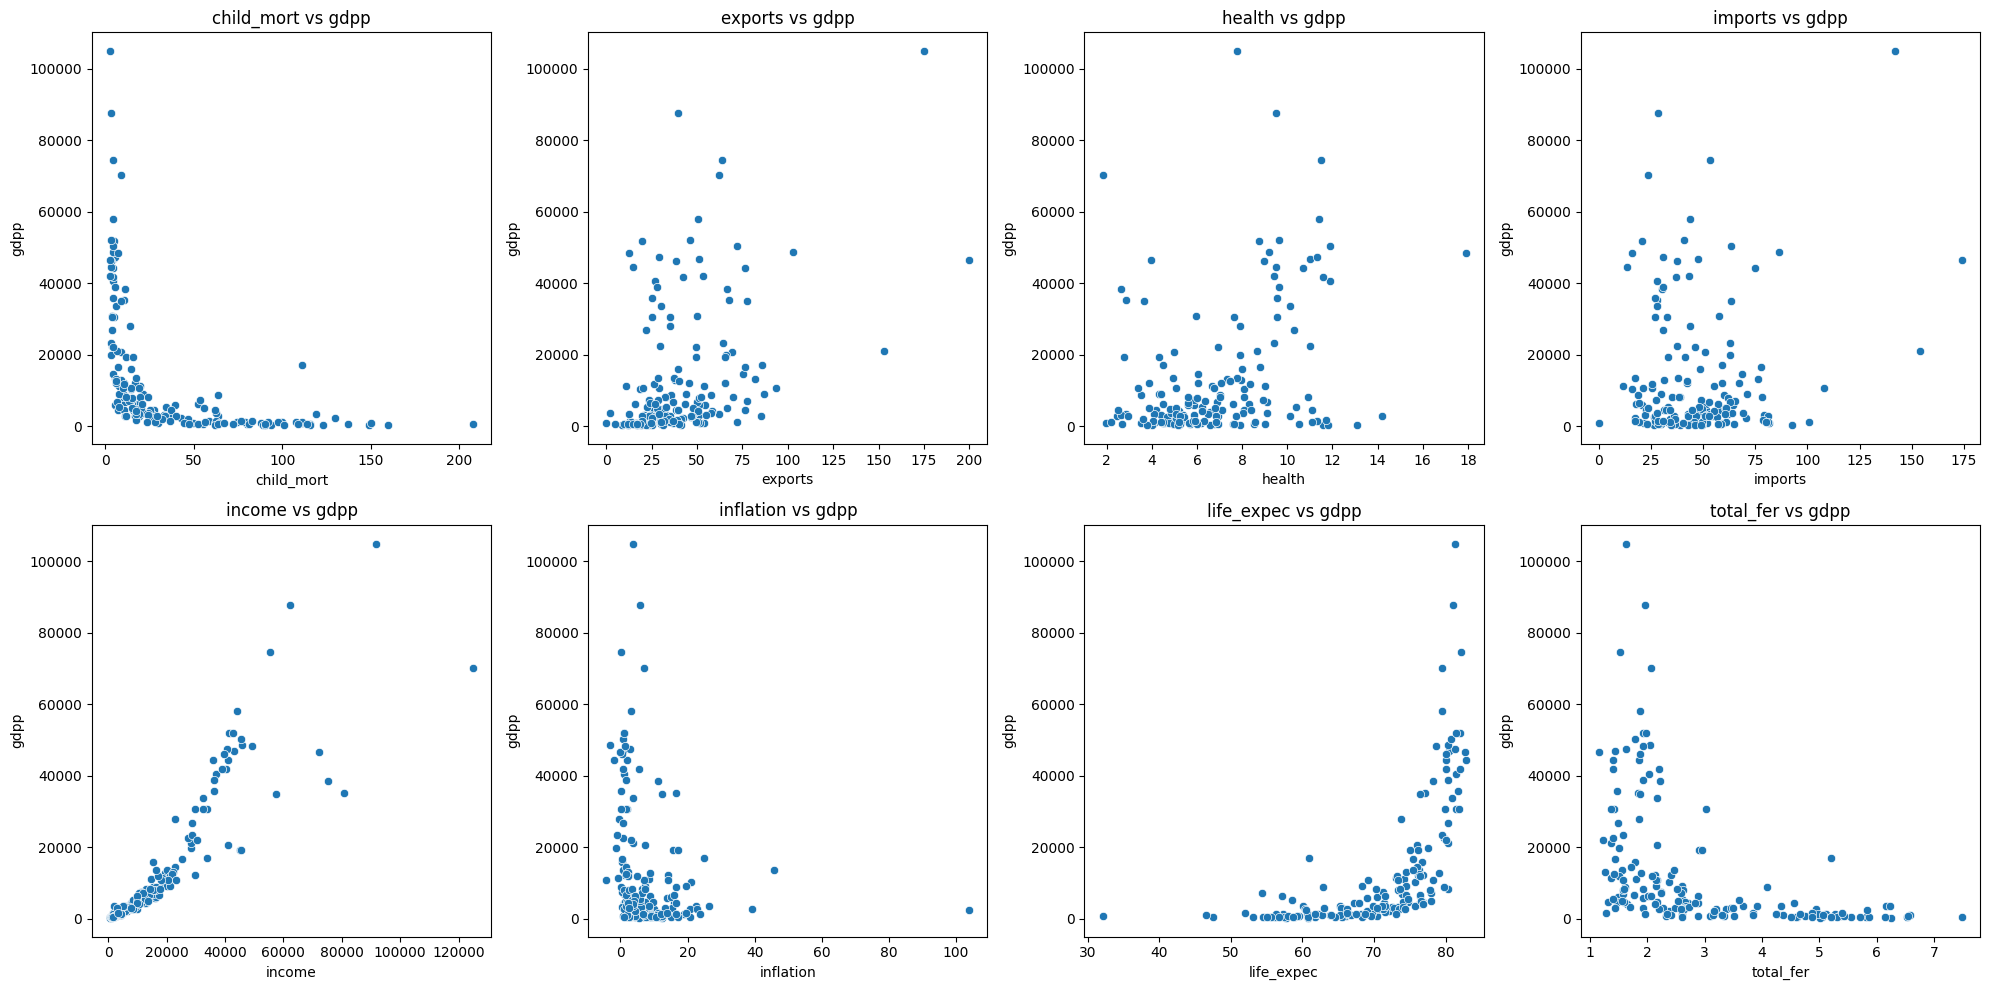

In [12]:
# Explore the continuous independent features against gdpp using scatter plots.
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
variables = ctry_df.columns
for i in range(len(variables)-1):
        subplot = ax[i // 4, i % 4]
        sns.scatterplot(x=variables[i], y=variables[-1], data=ctry_df, ax=subplot, legend=False)
        subplot.set_title(f"{variables[i]} vs {variables[-1]}")
plt.tight_layout()
plt.show()

From the above scatterplot, we can observere few things such as if the income increases the country GDP per capita of that country is also increasing. Also, life expectancy is high if the GDP of the coutry increases.

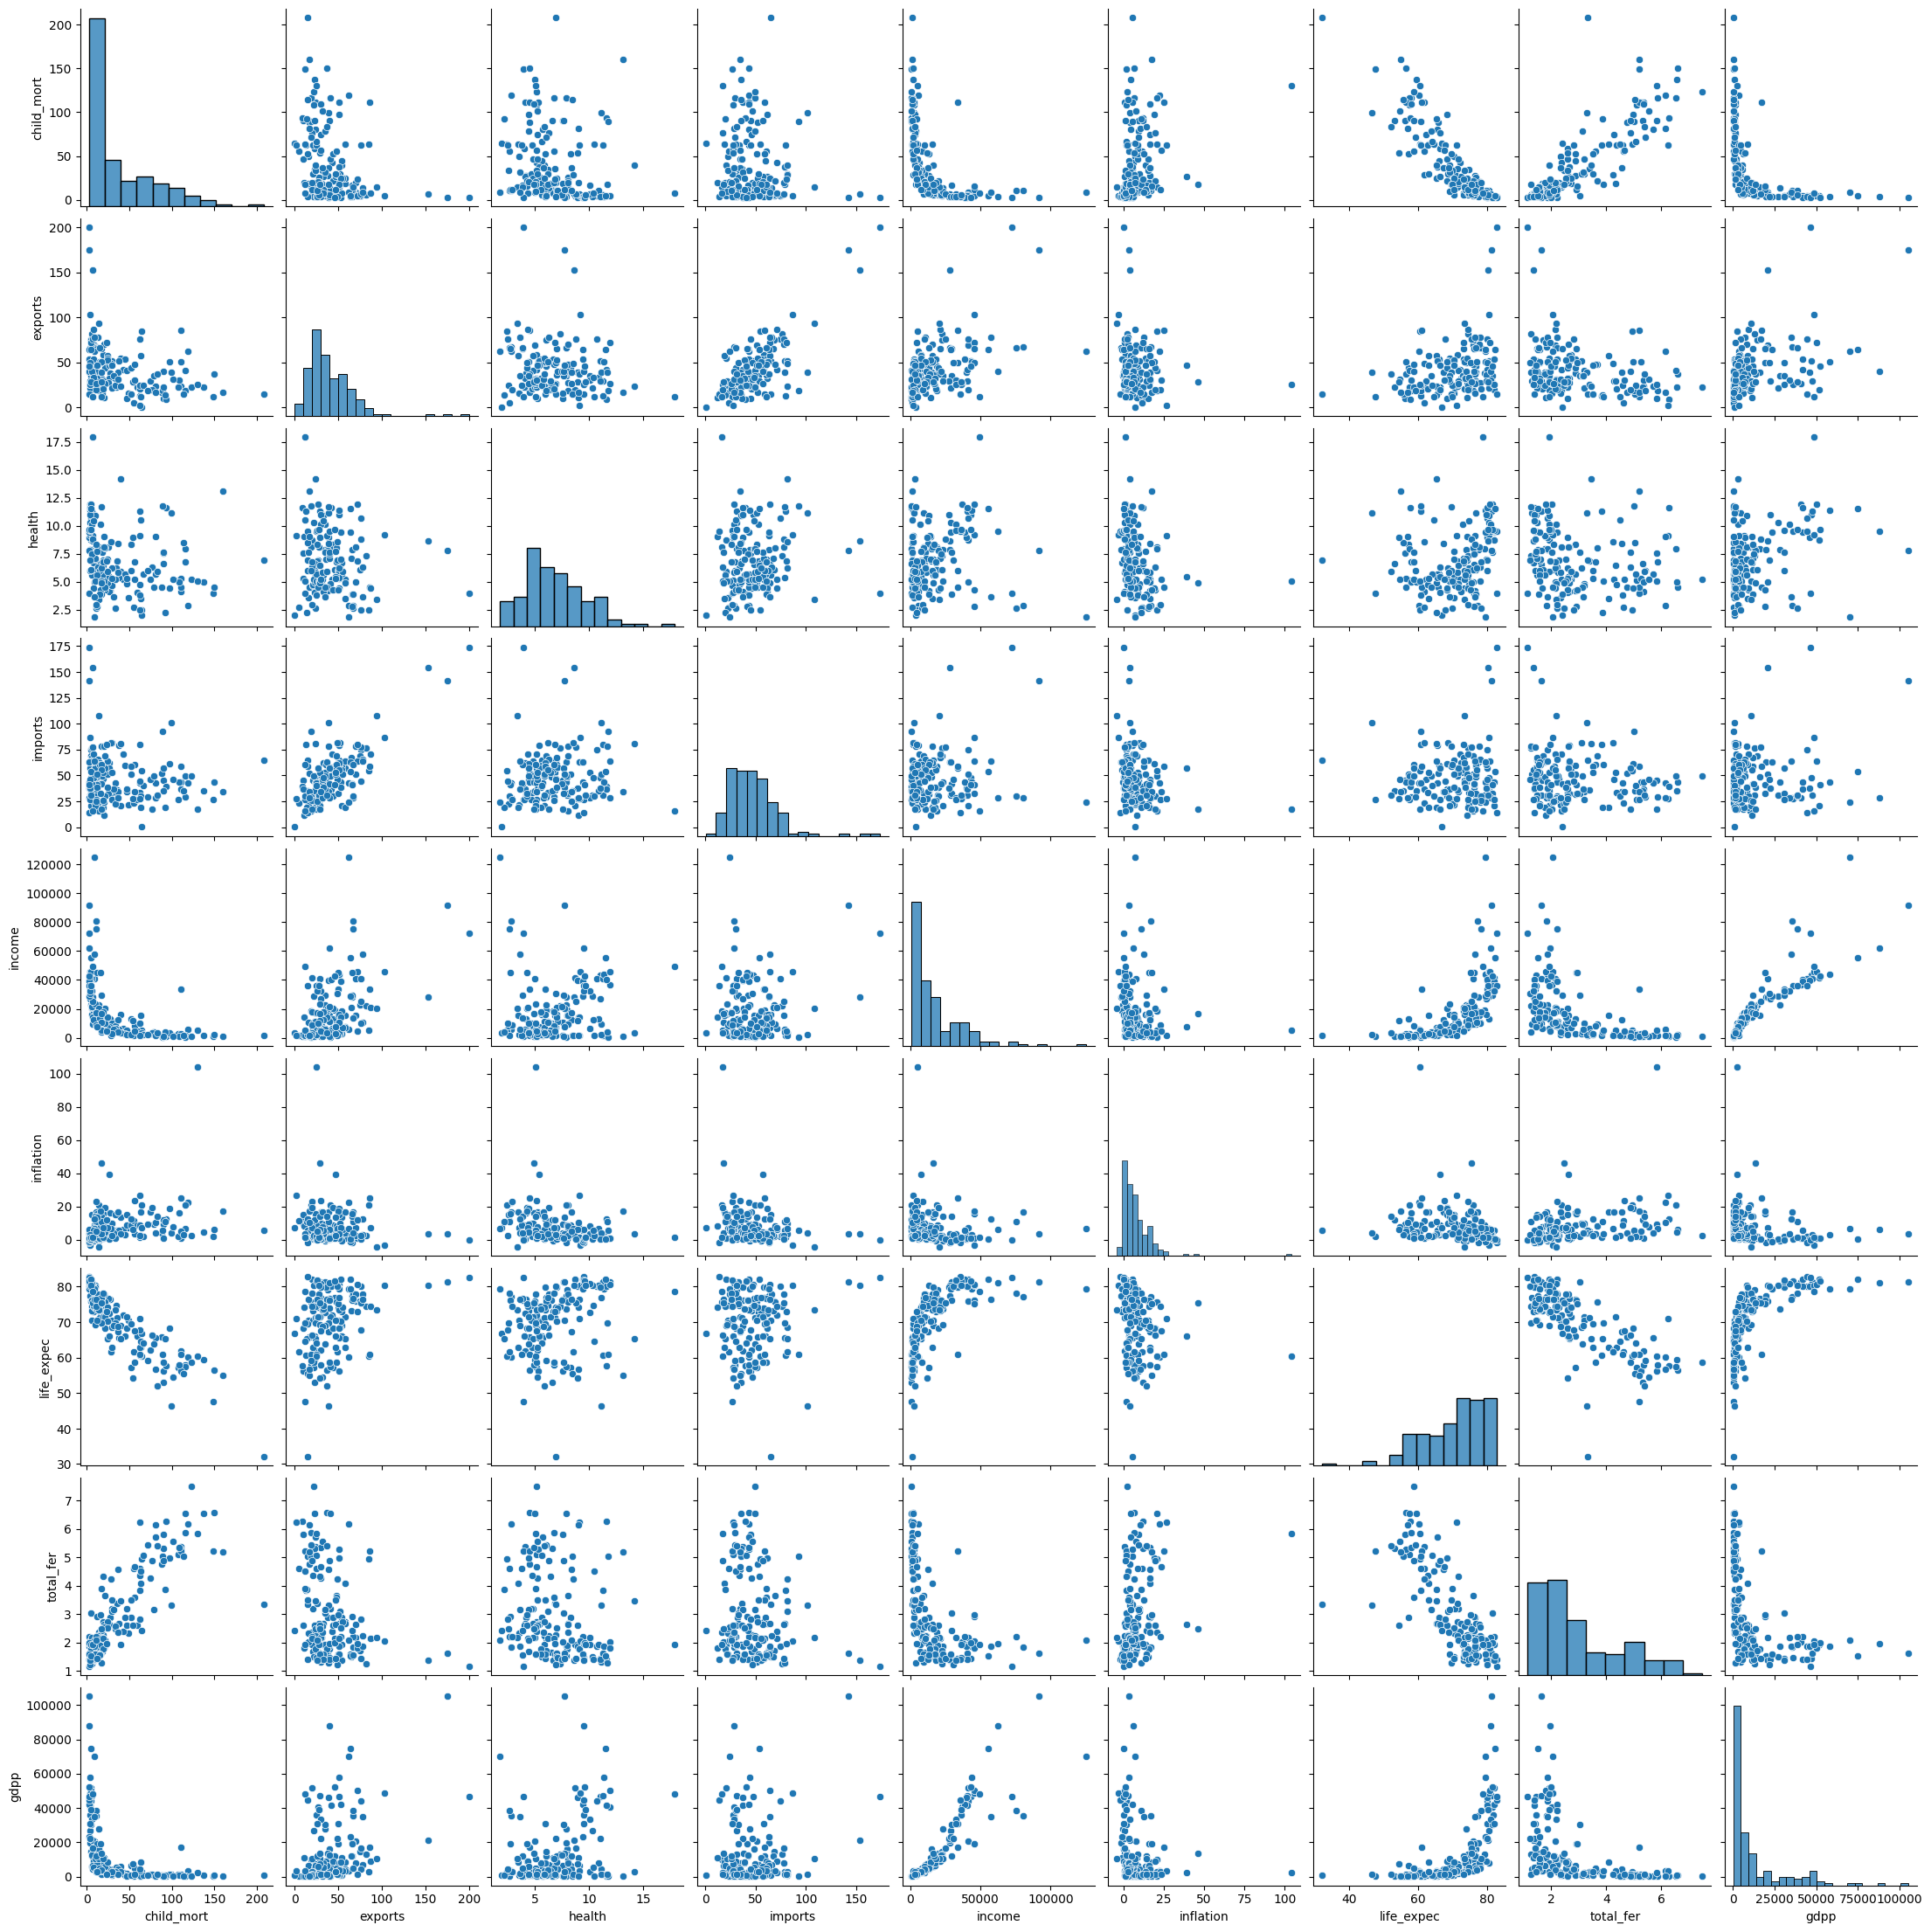

In [13]:
# Create a pair plot
sns.pairplot(data = ctry_df)

Note the peaks in the diagonal graphs that are distinct from each other or only overlap slightly. 

Looking at the scatter plot distributions above, features such as child_mort, life_expec, health, exports, gdpp are some of the features that would be good candidates for clustering the data.

### Scaling the Data

In [14]:
# Normalise the data using MinMaxScaler
# Name the normalised dataframe as "df_scaled"
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(ctry_df)


## K-Means Clustering

### Selecting K

Now we will do anlysis on Elbow method and Silhouette score to determine the optimal number of clusters. 

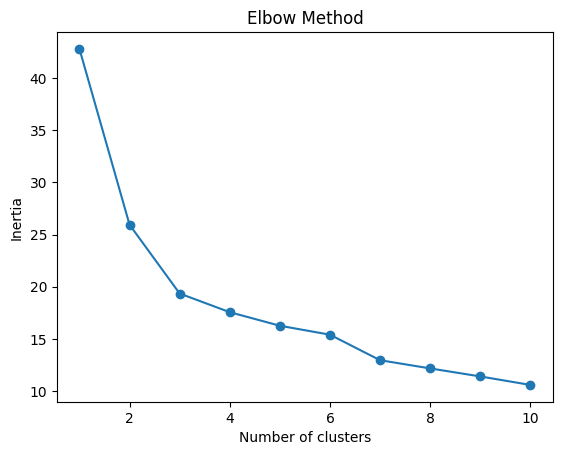

In [15]:
# Plot elbow curve
def eval_Kmeans(x, k, r):
    kmeans = KMeans(n_clusters=k, random_state=r, max_iter=500)
    kmeans.fit(x)
    return kmeans.inertia_

def elbow_Kmeans(x, max_k=10, r=42):
    within_cluster_vars = [eval_Kmeans(x, k, r) for k in range(1, max_k+1)]
    plt.plot(range(1, 11), within_cluster_vars,marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Plot elbow curve using scaled dataset

elbow_Kmeans(df_scaled)

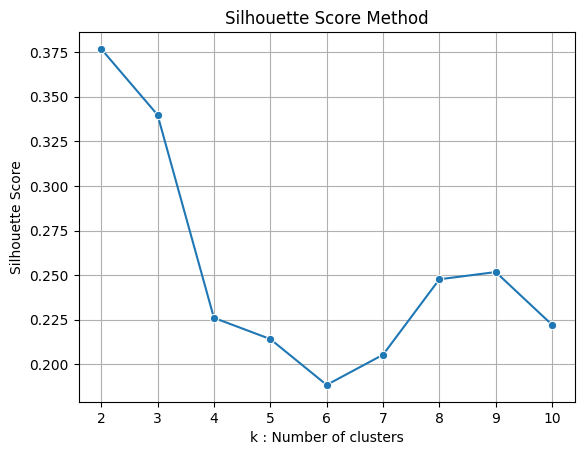

In [16]:
# Silhouette score method
kmax = 10
sil = []
plt.plot()
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=rseed, max_iter=500)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_scaled, labels, metric='euclidean'))

sns.lineplot(x=range(2, kmax+1), y=sil, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('k : Number of clusters')
plt.ylabel("Silhouette Score")
plt.grid(visible=True)
plt.show()

Based on the elbow and silhouette score method the value for K is 2.

## Fitting a K-Means Model with the selected K value

In [17]:

# Train the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=2, random_state=rseed)

kmeans.fit(df_scaled)

KMeans(n_clusters=2, random_state=42)

## Predictions

In [18]:
# Turn df_scaled data back into a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=variables)

# Add the predicted cluster label column to the original dataframe
df_scaled['Cluster'] = kmeans.labels_

In [19]:
# Check first few observations
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,0
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,0
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1


In [20]:
# Count the number of records in each cluster
df_scaled['Cluster'].value_counts()

Cluster
1    112
0     55
Name: count, dtype: int64

Now, compute the mean Silhouette Coefficient of all observations to check the performance

In [21]:
# Check model performance with the silhouette coefficient
silhouette_avg = silhouette_score(df_scaled, kmeans.labels_)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.621


## Visualisation of clusters

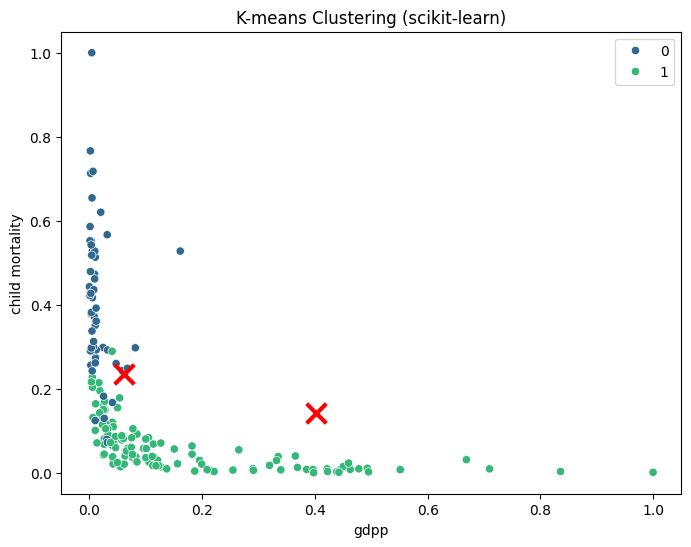

In [22]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, y='child_mort', x='gdpp', hue=kmeans.labels_, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.ylabel('child mortality')
plt.xlabel('gdpp')
plt.title('K-means Clustering (scikit-learn)')
plt.show()

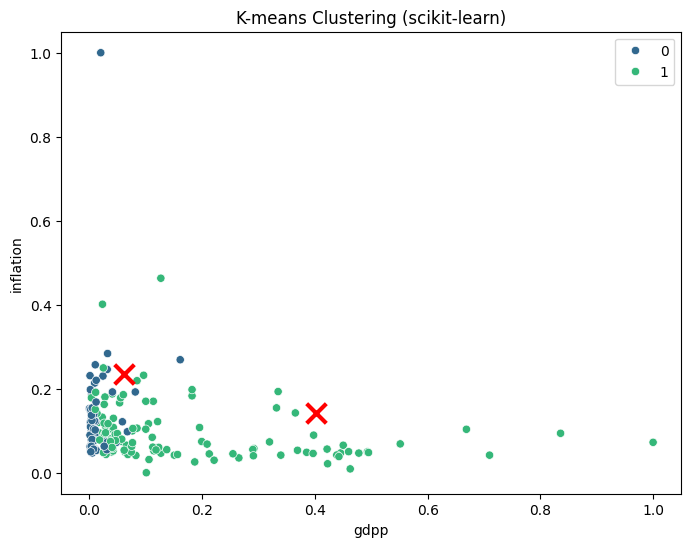

In [23]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, y='inflation', x='gdpp', hue=kmeans.labels_, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.ylabel('inflation')
plt.xlabel('gdpp')
plt.title('K-means Clustering (scikit-learn)')
plt.show()

## Conclusions

Label the groups of countries in the plots you created based on child mortality, GDPP and inflation. You may use [terms](https://en.wikipedia.org/wiki/Developing_country#Terms_used_to_classify_countries) such as: least developed, developing and developed, or low, low-middle, upper-middle and high income. Alternatively, simply rank them from highest to lowest. Justify the labels you assign to each group.


In [24]:
# Give each cluster a name
cluster_names = {
    0: 'Under developed Countries',
    1: 'Developed Countries',
}

# Map the cluster names to the 'Cluster' column
df_scaled['Cluster'] = df_scaled['Cluster'].map(cluster_names)

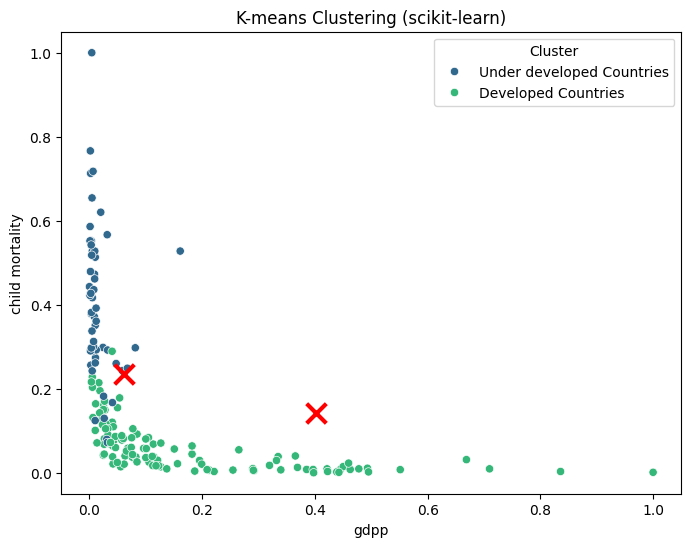

In [25]:
# Visualisation of clusters: child mortality vs gdpp
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, y='child_mort', x='gdpp', hue='Cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.ylabel('child mortality')
plt.xlabel('gdpp')
plt.title('K-means Clustering (scikit-learn)')
plt.show()

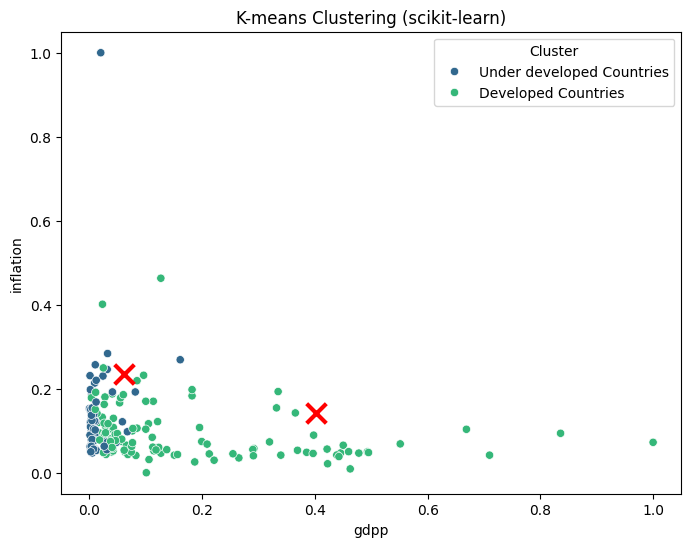

In [26]:
# Visualisation of clusters: inflation vs gdpp
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_scaled, y='inflation', x='gdpp', hue='Cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.ylabel('inflation')
plt.xlabel('gdpp')
plt.title('K-means Clustering (scikit-learn)')
plt.show()

**Answer here:**

We got optimal number of clusters from KMeans algorithm as 2, so we ended up grouping of countries into 2 groups such as Under Developed countries and Developed countries. 

From the above visualisation of clusters we found that child mortality under 5 years of age (per 1000 live births) is high for the countires where GDP per capita is low(under developed countries). Also, it shows that many countries where inflation is high, if the GDP per capita is low(both for under developed or developed countries). 